# Веб-скрейпинг и таблицы

*Алла Тамбовцева, НИУ ВШЭ*

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url, ) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [4]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [5]:
soup = BeautifulSoup(page.text, 'lxml')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [6]:
soup

<!DOCTYPE html>
<html class="old-town-road no-js bg-fixed" lang="" style="background-image:url(https://nplus1.ru/images/2022/05/25/2e80c14768dcb5acec98e9cbf3a407a8.jpg)">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>
<link href="https://nplus1.ru" rel="canonical"/>
<link href="/i/favicon-bw.png" rel="icon"/>
<title>N + 1: научные статьи, новости, открытия</title>
<!-- for Google -->
<meta content="N + 1: научные статьи, новости, открытия" name="description"/>
<meta content="" name="author"/>
<meta content="" name="copyright"/>
<!-- for Facebook -->
<meta content="N + 1: научные статьи, новости, открытия" property="og:title"/>
<meta content="https://nplus1.ru/i/logo.og.png" prop

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="old-town-road no-js bg-fixed" lang="" style="background-image:url(https://nplus1.ru/images/2022/05/25/2e80c14768dcb5acec98e9cbf3a407a8.jpg)">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>
  <link href="https://nplus1.ru" rel="canonical"/>
  <link href="/i/favicon-bw.png" rel="icon"/>
  <title>
   N + 1: научные статьи, новости, открытия
  </title>
  <!-- for Google -->
  <meta content="N + 1: научные статьи, новости, открытия" name="description"/>
  <meta content="" name="author"/>
  <meta content="" name="copyright"/>
  <!-- for Facebook -->
  <meta content="N + 1: научные статьи, новости, открытия" property="og:title"/>
  <meta conten

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [8]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
/
#
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
/theme/bookshelf
/theme/Courses
/theme/coronavirus-history
/theme/offline
/
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
#
/theme/bookshelf
/theme/Courses
/theme/coronavirus-history
/theme/offline
https://nplus1.ru/blog/2022/05/27/prehistoric-planet-forests
https://nplus1.ru/blog/2022/05/27/prehistoric-planet-forests
https://nplus1.ru/blog/2022/05/27/tales-from-the-edge-of-the-self
https://nplus1.ru/blog/2022/05/26/prehistoric-planet-ice-worlds
https://nplus1.ru/blog/2022/05/25/rebel-cell
https://nplus1.ru/blog/2022/05/25/prehistoric-planet-freshwater
https://nplus1.ru/blog/2022/05/24/prehistoric-planet-deserts
https://nplus1.ru/blog/2022/05/23/prehistoric-planet
https://nplus1.ru/blog/2022/05/23/some-assembly-required
https://nplus1.ru/blog/2022/05/19/chemical-laboratory
https://nplus1.ru/blog/2022/05/31/jellyfish-age-backwards
/news/2022/06/01/lower-paleolithic
/news/2022/06/0

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [12]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append('https://nplus1.ru'+link.get('href'))
urls

['https://nplus1.ru/news/2022/06/01/lower-paleolithic',
 'https://nplus1.ru/news/2022/06/01/egyptian-hollow-casting',
 'https://nplus1.ru/news/2022/06/01/yakutia-sukachevae',
 'https://nplus1.ru/news/2022/05/31/ingenuity-mars-winter',
 'https://nplus1.ru/news/2022/05/31/sofia-r-aqua',
 'https://nplus1.ru/news/2022/05/31/askap-strange-signal',
 'https://nplus1.ru/news/2022/05/31/grb-binary-ns-to-magnetar',
 'https://nplus1.ru/news/2022/05/31/megalodon-extinction',
 'https://nplus1.ru/news/2022/05/31/smbh-in-dying-galaxies',
 'https://nplus1.ru/news/2022/05/31/frontier',
 'https://nplus1.ru/news/2022/05/31/3-days-liver-transplantation',
 'https://nplus1.ru/news/2022/05/31/ixpe-polarization-magnetar',
 'https://nplus1.ru/news/2022/05/31/mittani',
 'https://nplus1.ru/news/2022/05/31/list-of-exomoons',
 'https://nplus1.ru/news/2022/05/31/monachus-monachus',
 'https://nplus1.ru/news/2022/05/31/maven',
 'https://nplus1.ru/news/2022/05/31/maya-city',
 'https://nplus1.ru/news/2022/05/31/psr-j-0

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [14]:
url0 = urls[0]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'lxml')

In [15]:
url0

'https://nplus1.ru/news/2022/06/01/lower-paleolithic'

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [16]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>,
 <meta content="2022-06-01" itemprop="datePublished"/>,
 <meta content="Михаил Подрезов" name="mediator_author"/>,
 <meta content="Артефакты могут указать на маршрут расселения древних людей" name="description"/>,
 <meta content="Михаил Подрезов" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Археологи обнаружили на турецком побережье четыре местонахождения с орудиями нижнего палеолита" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2022/06/01/06f117e3c8c966753279f8cdd4423284.jpeg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2022/06/01/lower-paleolithic" property="og:ur

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [17]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Михаил Подрезов" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [18]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Михаил Подрезов" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [19]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Михаил Подрезов'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [20]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Михаил Подрезов'

Аналогичным образом извлечем дату, заголовок и описание.

In [21]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [22]:
soup0.find_all('p')[1]

<p class="table">
<a href="/news/2022/06/01">
<time content="2022-06-01" data-unix="1654071191" itemprop="datePublished">
<span>11:13</span>
<span>01 Июнь 2022</span>
</time>
</a>
</p>

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [23]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="archaeology" href="/rubric/archaeology">Археология</a>]

Получился список из одного элемента. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [24]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['Археология']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [25]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">3.3</span>]

И выберем оттуда текст.

In [26]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'3.3'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [27]:
text_list = soup0.find_all('p', {'class' : None})

In [28]:
text_list

[<p>Археологи провели на западе Турции исследование прибрежной зоны и обнаружили четыре местонахождения с каменными орудиями. В общей сложности в их распоряжении оказалось больше 500 артефактов из кремня, халцедона и кварца, относящихся к нижнему и среднему палеолиту. По мнению исследователей, коллекция находок оказалась схожа с орудиями, раскопанными на греческом острове Лесбос. Это может указывать на потенциальный маршрут расселения древних людей из Анатолии в Грецию. Об этом <a href="https://www.cambridge.org/core/journals/antiquity/article/lower-and-middle-palaeolithic-evidence-from-the-north-aegean-coastline-of-canakkale-turkey/9AB9519A0F23A0062E227D713AEAB62F" rel="nofollow" target="_blank">сообщается</a> в статье, опубликованной в журнале <i>Antiquity</i>.</p>,
 <p>Больше 2,5 миллиона лет назад <a href="https://antropogenez.ru/zveno-single/123/" rel="nofollow" target="_blank">началась</a> самая продолжительная эпоха в развитии материальной культуры людей – нижний (ранний) палеол

«Выцепим» все тексты (без тэгов) из полученного списка:

In [29]:
text = [t.text for t in text_list]

Склеим все элементы списка `text` через пробел:

In [30]:
final_text = ' '.join(text)
final_text

'Археологи провели на западе Турции исследование прибрежной зоны и обнаружили четыре местонахождения с каменными орудиями. В общей сложности в их распоряжении оказалось больше 500 артефактов из кремня, халцедона и кварца, относящихся к нижнему и среднему палеолиту. По мнению исследователей, коллекция находок оказалась схожа с орудиями, раскопанными на греческом острове Лесбос. Это может указывать на потенциальный маршрут расселения древних людей из Анатолии в Грецию. Об\xa0этом сообщается в\xa0статье, опубликованной в\xa0журнале Antiquity. Больше 2,5 миллиона лет назад началась самая продолжительная эпоха в развитии материальной культуры людей – нижний (ранний) палеолит. Для этого периода характерно появление примитивных каменных орудий, а также последовавшее за ним постепенное развитие техники расщепления камня. Основными инструментами в эпоху нижнего палеолита были рубяще-режущие макроорудия олдувайской (олдованской) культуры, древнейшие находки которых были сделаны в Восточной Африк

Все здорово, только мешают отступы-переходы на новую строку `\n`. Заменим их на пробелы с помощью метода `.replace`:

In [31]:
final_text = final_text.replace('\n', ' ')

In [32]:
final_text = final_text.replace('\xa0', ' ')

In [33]:
final_text

'Археологи провели на западе Турции исследование прибрежной зоны и обнаружили четыре местонахождения с каменными орудиями. В общей сложности в их распоряжении оказалось больше 500 артефактов из кремня, халцедона и кварца, относящихся к нижнему и среднему палеолиту. По мнению исследователей, коллекция находок оказалась схожа с орудиями, раскопанными на греческом острове Лесбос. Это может указывать на потенциальный маршрут расселения древних людей из Анатолии в Грецию. Об этом сообщается в статье, опубликованной в журнале Antiquity. Больше 2,5 миллиона лет назад началась самая продолжительная эпоха в развитии материальной культуры людей – нижний (ранний) палеолит. Для этого периода характерно появление примитивных каменных орудий, а также последовавшее за ним постепенное развитие техники расщепления камня. Основными инструментами в эпоху нижнего палеолита были рубяще-режущие макроорудия олдувайской (олдованской) культуры, древнейшие находки которых были сделаны в Восточной Африке. Около 

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [34]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    final_text = final_text.replace('\xa0', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [41]:
from time import sleep

In [42]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in urls:
    res = GetNews(link)
    news.append(res)
    sleep(1) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [43]:
news[0]

('https://nplus1.ru/news/2022/06/01/lower-paleolithic',
 '2022-06-01',
 'Михаил Подрезов',
 'Артефакты могут указать на маршрут расселения древних людей',
 'Археологи обнаружили на турецком побережье четыре местонахождения с орудиями нижнего палеолита',
 'Археологи провели на западе Турции исследование прибрежной зоны и обнаружили четыре местонахождения с каменными орудиями. В общей сложности в их распоряжении оказалось больше 500 артефактов из кремня, халцедона и кварца, относящихся к нижнему и среднему палеолиту. По мнению исследователей, коллекция находок оказалась схожа с орудиями, раскопанными на греческом острове Лесбос. Это может указывать на потенциальный маршрут расселения древних людей из Анатолии в Грецию. Об этом сообщается в статье, опубликованной в журнале Antiquity. Больше 2,5 миллиона лет назад началась самая продолжительная эпоха в развитии материальной культуры людей – нижний (ранний) палеолит. Для этого периода характерно появление примитивных каменных орудий, а такж

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [44]:
import pandas as pd

In [45]:
df = pd.DataFrame(news)

In [47]:
df.head(10)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2022/06/01/lower-paleol...,2022-06-01,Михаил Подрезов,Артефакты могут указать на маршрут расселения ...,Археологи обнаружили на турецком побережье чет...,Археологи провели на западе Турции исследовани...,[Археология],3.3
1,https://nplus1.ru/news/2022/06/01/egyptian-hol...,2022-06-01,Винера Андреева,Использовавшаяся египтянами известково-воскова...,Египетский археометаллург воссоздал древний ме...,Изучение двух бронзовых позолоченных статуэток...,"[Археология, История]",4.1
2,https://nplus1.ru/news/2022/06/01/yakutia-suka...,2022-06-01,Семён Морозов,"Возможно, это был опылитель древних растений",В якутском янтаре возрастом 95 миллионов лет н...,Ученые описали жука-шипоноску из якутского янт...,"[Палеонтология, Зоология]",3.4
3,https://nplus1.ru/news/2022/05/31/ingenuity-ma...,2022-05-31,Александр Войтюк,И не будет включать на ночь обогреватели для э...,«Индженьюити» сократит число полетов на время ...,Специалисты NASA представили план по энергосбе...,[Космонавтика],1.8
4,https://nplus1.ru/news/2022/05/31/sofia-r-aqua,2022-05-31,Александр Войтюк,И подтвердила наличие в системе пыли микронных...,Летающая обсерватория SOFIA увидела потемнение...,Астрономы при помощи летающей обсерватории SOF...,[Астрономия],3.9
5,https://nplus1.ru/news/2022/05/31/askap-strang...,2022-05-31,Александр Войтюк,Это может быть радиогалактика или квазар,Астрономы обнаружили загадочный радиоисточник ...,Астрономы в ходе исследований радиотелескопами...,[Астрономия],4.1
6,https://nplus1.ru/news/2022/05/31/grb-binary-n...,2022-05-31,Александр Войтюк,Его возраст составлял не более трех недель,Длинный гамма-всплеск связали с аномально мощн...,Длинный гамма-всплеск GRB 130310A может быть о...,[Астрономия],5.1
7,https://nplus1.ru/news/2022/05/31/megalodon-ex...,2022-05-31,Семён Морозов,Конкуренция могла быть одной из причин вымиран...,Изотопы цинка указали на конкуренцию между мег...,Ученые проанализировали соотношение изотопов ц...,"[Палеонтология, Экология и климат]",4.9
8,https://nplus1.ru/news/2022/05/31/smbh-in-dyin...,2022-05-31,Александр Войтюк,Подобные галактики содержат повсеместно активн...,Спокойные массивные галактики подтвердили пода...,Астрономы получили новое подтверждение идеи о ...,[Астрономия],4.6
9,https://nplus1.ru/news/2022/05/31/frontier,2022-05-31,Григорий Копиев,"Он имеет мощность 1,102 экзафлопса",Американский суперкомпьютер первым преодолел э...,Проект TOP500 опубликовал новую версию рейтинг...,[IT],2.2


Переименуем столбцы в базе.

In [49]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [50]:
df.head(2)

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2022/06/01/lower-paleol...,2022-06-01,Михаил Подрезов,Артефакты могут указать на маршрут расселения ...,Археологи обнаружили на турецком побережье чет...,Археологи провели на западе Турции исследовани...,[Археология],3.3
1,https://nplus1.ru/news/2022/06/01/egyptian-hol...,2022-06-01,Винера Андреева,Использовавшаяся египтянами известково-воскова...,Египетский археометаллург воссоздал древний ме...,Изучение двух бронзовых позолоченных статуэток...,"[Археология, История]",4.1


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [51]:
df['diffc'] = [float(i) for i in df.diffc]

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [52]:
df.diffc.describe()

count    29.000000
mean      4.558621
std       1.453694
min       1.800000
25%       3.700000
50%       4.600000
75%       5.600000
max       7.800000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

<AxesSubplot:ylabel='Frequency'>

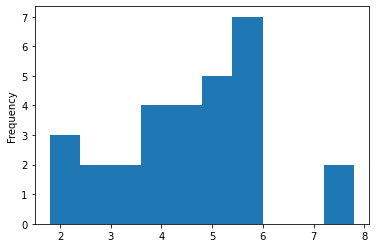

In [53]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [37]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [ ]:
df.text[0]

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [38]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [39]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [40]:
df.clean_text[0]

'Российский военно-транспортный самолет Ил-112В совершил первый полет, сообщает Авиационный комплекс имени Ильюшина. Испытания прошли на аэродроме воронежского авиазавода ПАО «ВАСО», командиром экипажа был шеф-пилот ПАО «Ил» Герой России Николай Куимов. Первый полет стал завершением цикла аэродромной отработки, в ходе которой были проведены испытания всех систем, в том числе пробежки по аэродрому. Полет прошел в штатном режиме. В воздухе Ил-112В сопровождал самолет-лаборатория Ил-114ЛЛ. Ил-112В в перспективе должен заменить легкий транспортник Ан-26. Он будет использоваться для перевозки и десантирования легкой техники, грузов и бойцов, его грузоподъемность — около пяти тонн. Самолет сможет развивать скорость до 550 километров в час и совершать полеты на расстояние до 3,4 тысячи километров, а при взлете с грунтовых аэродромов и максимальной загрузкой — до 1,2 тысячи километров. Транспортник сможет взлетать с взлетно-посадочных полос длиной не более 900 метров. Пробег Ил-112В при посадк

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [41]:
df.to_excel('nplus-news.xlsx')